In [1]:
from model import *
from data import *

Using TensorFlow backend.
d:\clarifruit\unet\unet_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\clarifruit\unet\unet_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\clarifruit\unet\unet_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\clarifruit\unet\unet_env\lib\site-packages\tensorflow\python\framewo

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

In [2]:
train_path = 'data/train'

### Train with data generator

In [3]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,train_path,'image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_cherry_stem.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=100,epochs=3,callbacks=[model_checkpoint])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\Clarifruit\unet\model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/3
Found 133 images belonging to 1 classes.
Found 133 images belonging to 1 classes.
100/100 [==============================] - 37s 372ms/step - loss: 0.2610 - acc: 0.9763

Epoch 00001: loss improved from inf to 0.26206, saving model to unet_cherry_stem.hdf5
Epoch 2/3
100/100 [==============================] - 26s 257ms/step - loss: 0.2521 - acc: 0.9844

Epoch 00002: loss improved from 0.26206 to 0.25197, saving model to unet_cherry_stem.hdf5
Epoch 3/3
100/100 [==============================] - 25s 255ms/step - loss: 0.2463 - acc: 0.9847

Epoch 00003: loss improved from 0.25197 to 0.24715, saving model to unet_cherry_stem.hdf5


### test your model and save predicted results

In [42]:
def testGenerator1(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    image_gen = os.scandir(test_path)
    for i in range(num_image):
        img_path = next(image_gen).path
        img = io.imread(img_path,as_gray = as_gray)
        img = trans.resize(img,target_size)
        #img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


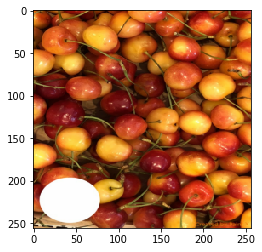

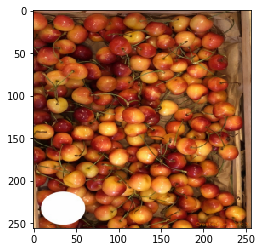

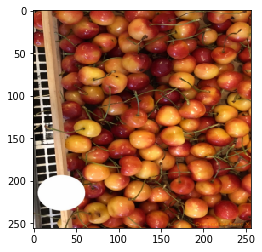

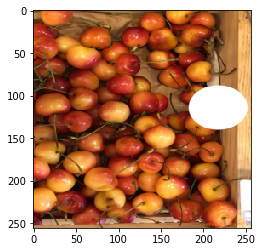

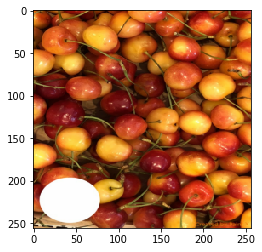

In [45]:
import matplotlib.pyplot as plt

testGene = testGenerator1(test_path,as_gray=False)
for i in range(5):
    img = next(testGene)[0]
    plt.figure()
    plt.imshow(img)

In [46]:
test_path = 'data/test/image'
testGene = testGenerator1(test_path,as_gray=False)
model = unet()
model.load_weights('unet_cherry_stem.hdf5')
results = model.predict_generator(testGene,30,verbose=1)
saveResult(test_path,results)

ValueError: Error when checking input: expected input_15 to have shape (256, 256, 1) but got array with shape (256, 256, 3)